# Analysis - exp30-35

- Parameter sensivitity testing

In [6]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

# Load data

In [51]:
path = "/Users/type/Code/azad/data/wythoff/exp30/"
exp_30 = load_stumbler_data(path)
grid_30 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp31/"
exp_31 = load_stumbler_data(path)
grid_31 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp32/"
exp_32 = load_stumbler_data(path)
grid_32 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp33"
exp_33 = load_stumbler_data(path, (0, 10))
grid_33 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp34/"
exp_34 = load_stumbler_data(path, (0, 10))
grid_34 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp35/"
exp_35 = load_stumbler_data(path)
grid_35 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

In [52]:
pprint(exp_30[0].keys())
pprint(exp_31[0].keys())
pprint(exp_32[0].keys())
pprint(exp_33[0].keys())
pprint(exp_34[0].keys())
pprint(exp_35[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


# Plots

## Learning rates

### Influence

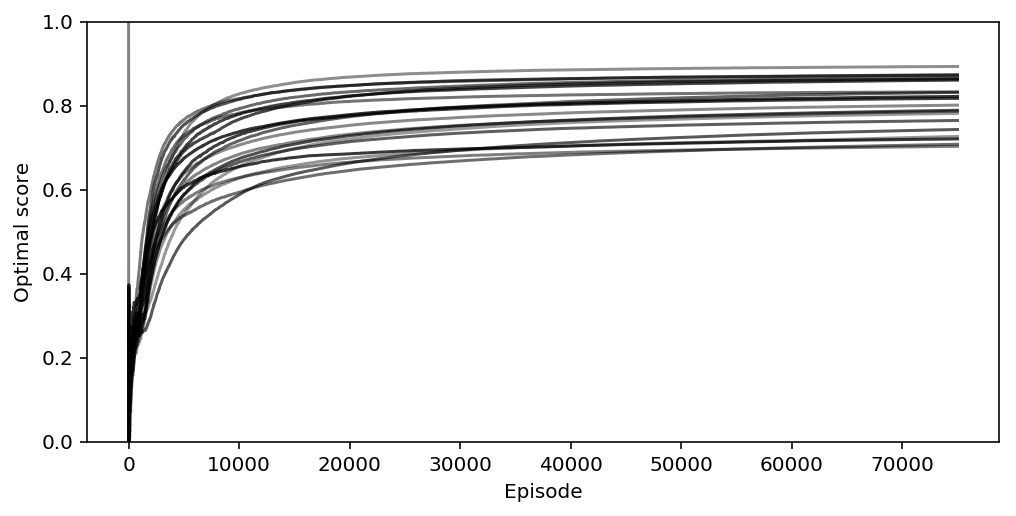

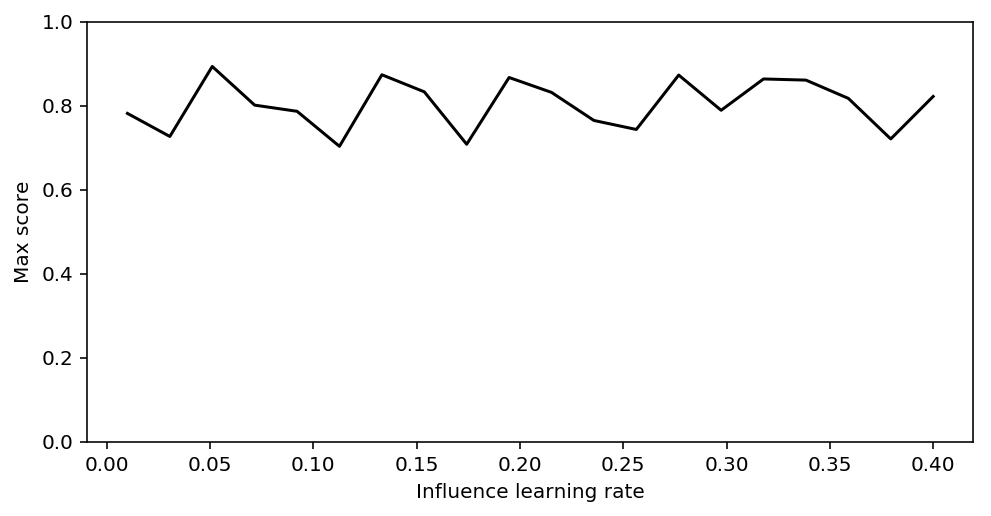

In [43]:
alphas = np.linspace(.4, 0.8, len(exp_30))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_30):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_30[:, 1].flatten()
exp_30_max = []
for n, mon in enumerate(exp_30):
    exp_30_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_30_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Influence learning rate")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)

### Stumbler

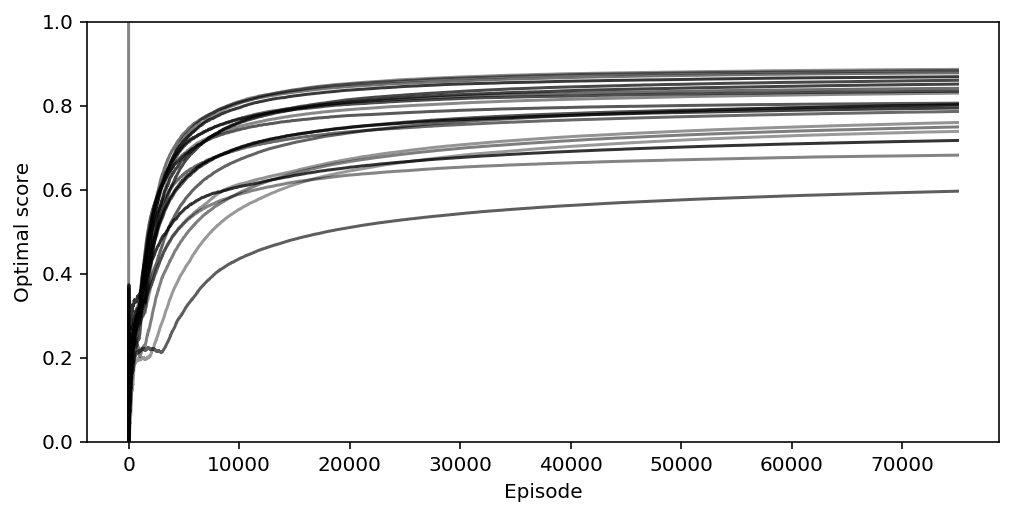

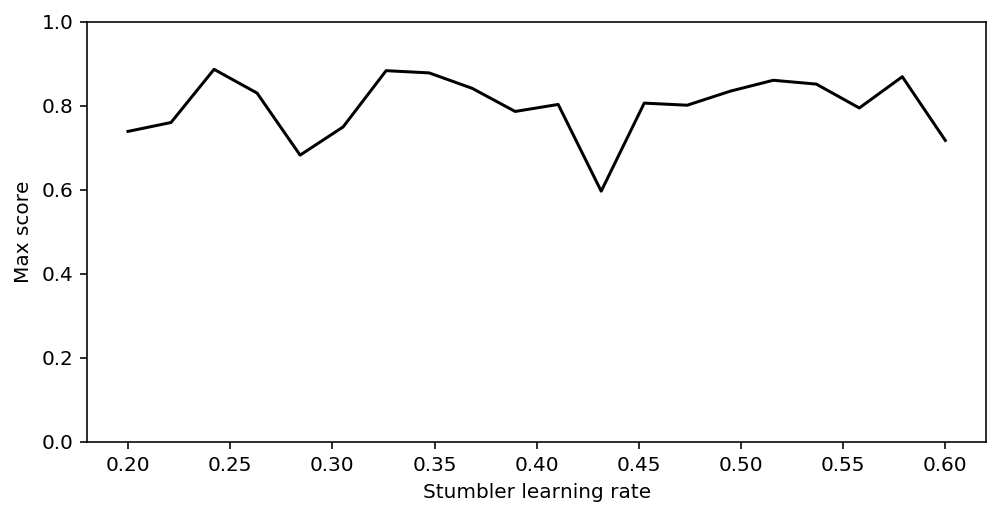

In [42]:
alphas = np.linspace(.4, 0.8, len(exp_31))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_31):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_31[:, 1].flatten()
exp_31_max = []
for n, mon in enumerate(exp_31):
    exp_31_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_31_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Stumbler learning rate")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)

### Strategist

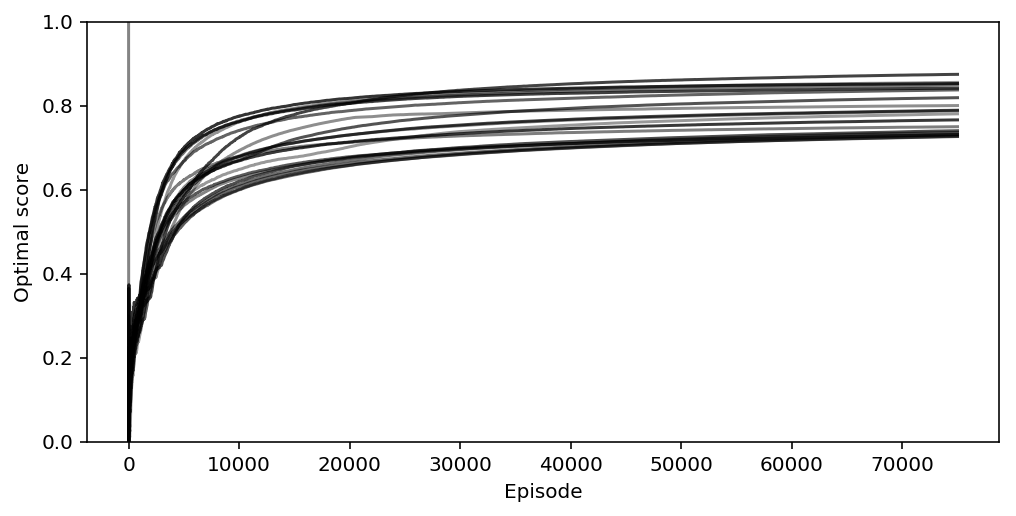

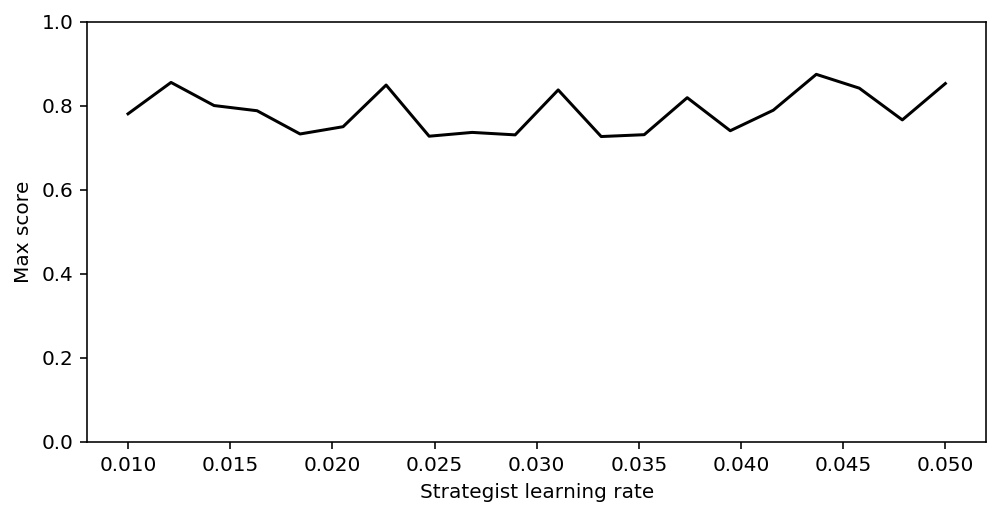

In [45]:
alphas = np.linspace(.4, 0.8, len(exp_32))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_32):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_32[:, 1].flatten()
exp_32_max = []
for n, mon in enumerate(exp_32):
    exp_32_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_32_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Strategist learning rate")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)

### Thresholds

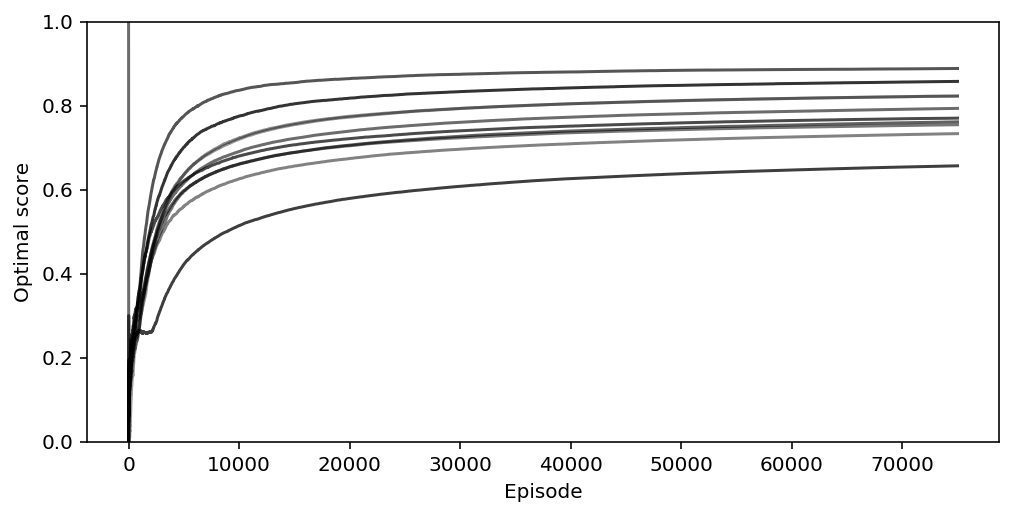

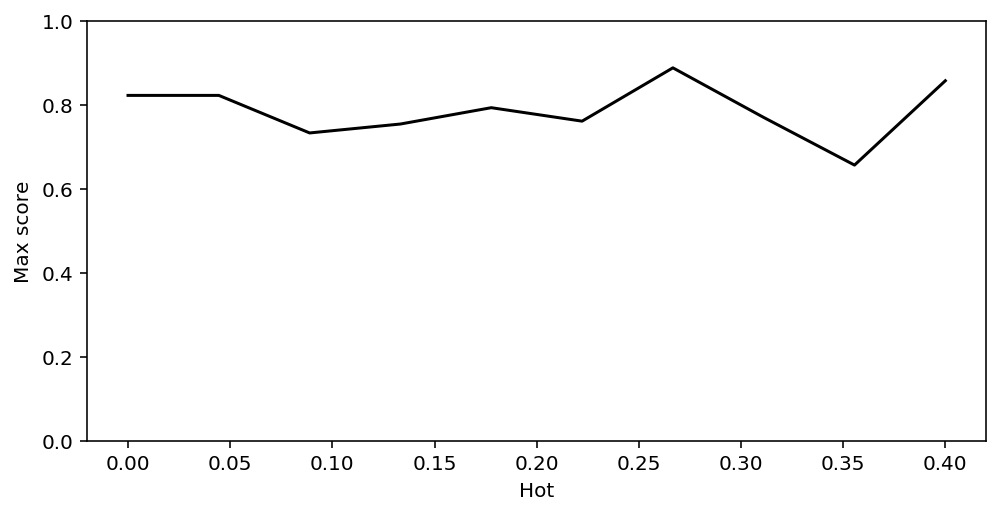

In [46]:
alphas = np.linspace(.4, 0.8, len(exp_33))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_33):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_33[:, 1].flatten()
exp_33_max = []
for n, mon in enumerate(exp_33):
    exp_33_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_33_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Hot")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)

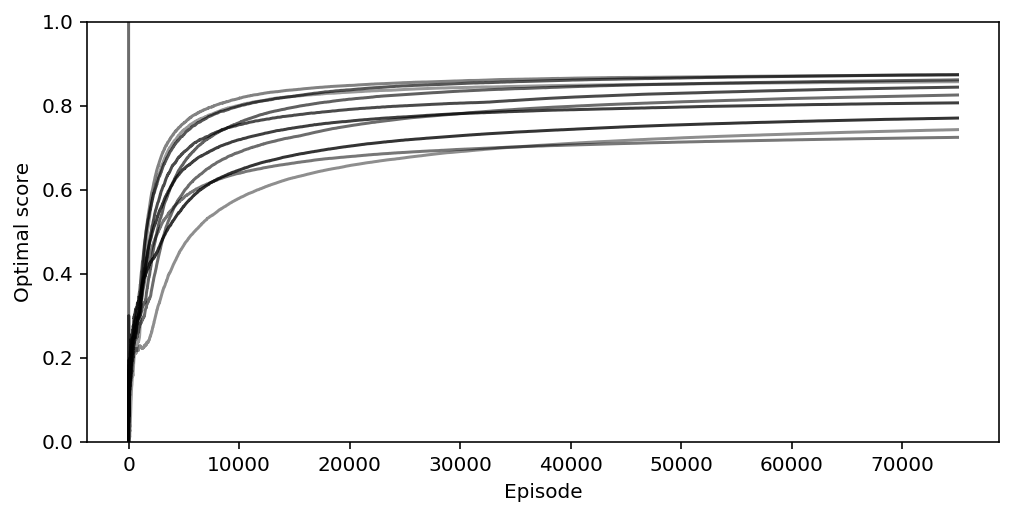

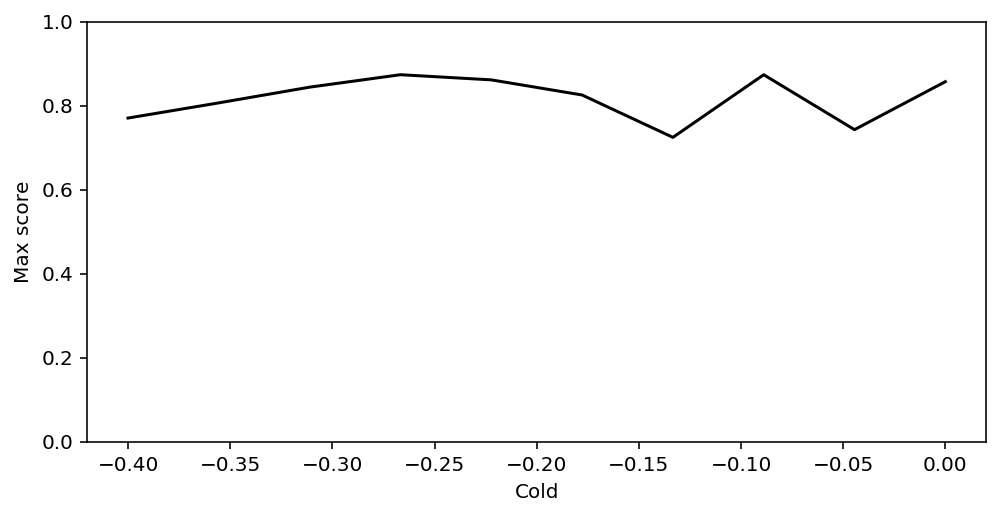

In [48]:
alphas = np.linspace(.4, 0.8, len(exp_34))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_34):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_34[:, 1].flatten()
exp_34_max = []
for n, mon in enumerate(exp_34):
    exp_34_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_34_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Cold")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)

## Epsilon

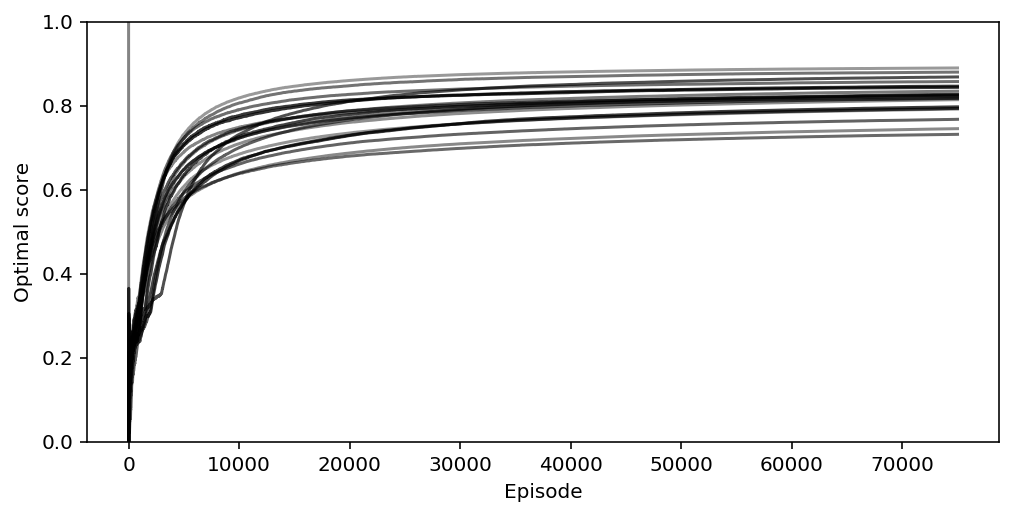

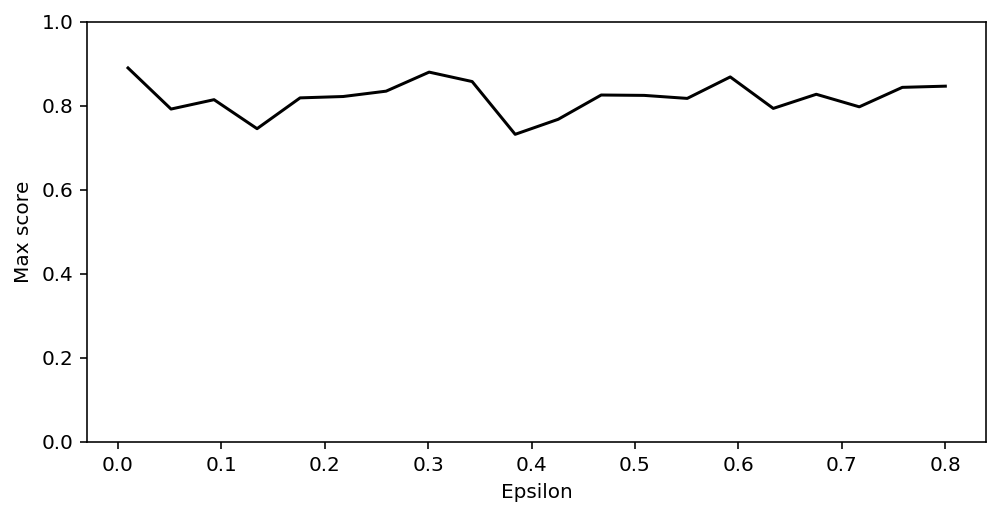

In [54]:
alphas = np.linspace(.4, 0.8, len(exp_35))
plt.figure(figsize=(7, 3.5))

for n, mon in enumerate(exp_35):
    alpha = alphas[n]
    _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=alphas[n], label=label)

_ = plt.tight_layout()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal score")
_ = plt.ylim(0, 1)

epsilons = grid_35[:, 1].flatten()
exp_35_max = []
for n, mon in enumerate(exp_35):
    exp_35_max.append(np.max(mon["score"][-100:-1]))

plt.figure(figsize=(7, 3.5))
_ = plt.plot(epsilons, exp_35_max, color='black')
_ = plt.tight_layout()
_ = plt.xlabel("Epsilon")
_ = plt.ylabel("Max score")
_ = plt.ylim(0, 1)